In [24]:
# !pip install --upgrade pip
# !pip install --upgrade setuptools


In [25]:
# !apt-get install -y python3-dev
# !pip install scikit-learn


In [1]:
# !pip3 install pyproject.toml-based
!pip3 install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 29.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 53.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 50.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━

In [1]:
import pandas as pd
import ktrain
from ktrain import text
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv("https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/TOPICS/DATA/MN-DS-news-classification.csv")
df = df.rename(columns={'category_level_1': 'category_1', 'category_level_2': 'category_2'})

In [16]:
df

,data_id,id,date,source,title,content,author,url,published,published_utc,collection_utc,category_1,category_2
0,1809,abcnews--2019-10-31--Virginia mom charged with...,2019-10-31,abcnews,Virginia mom charged with murder in 2-year-old...,The Virginia woman whose 2-year-old son was fo...,NaN,https://abcnews.go.com/US/wireStory/virginia-m...,"Thu, 31 Oct 2019 16:49:56 -0400",1572554996,1572559512,"crime, law and justice",crime
1,1980,abcnews--2019-11-07--2 escaped murder suspects...,2019-11-07,abcnews,2 escaped murder suspects arrested at US-Mexic...,Authorities are trying to determine if anyone ...,NaN,https://abcnews.go.com/US/wireStory/escaped-mu...,"Thu, 07 Nov 2019 00:13:12 -0500",1573103592,1573131986,"crime, law and justice",crime
2,1995,abcnews--2019-11-07--Family turns in escaped b...,2019-11-07,abcnews,"Family turns in escaped boy, 13, suspected in ...",A 13-year-old suspect in a double homicide who...,NaN,https://abcnews.go.com/US/wireStory/family-tur...,"Thu, 07 Nov 2019 07:39:54 -0500",1573130394,1573131982,"crime, law and justice",crime
3,2740,abcnews--2019-12-02--Mother charged with murde...,2019-12-02,abcnews,Mother charged with murder in deaths of 2 youn...,The mother of two young children found hanging...,NaN,https://abcnews.go.com/US/wireStory/mother-cha...,"Mon, 02 Dec 2019 11:30:59 -0500",1575304259,1575308811,"crime, law and justice",crime
4,7038,ageofautism--2019-04-12--Physician Father and ...,2019-04-12,ageofautism,"Physician, Father and Caretaker of 29 Year Old...","""One family member said Derek “can be violent ...",Age of Autism,http://feedproxy.google.com/~r/ageofautism/~3/...,2019-04-12 09:00:00+00:00,1555074000,1567543083,"crime, law and justice",crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10912,907640,therussophileorg--2019-12-15--Iran to build ov...,2019-12-15,therussophileorg,"Iran to build over 30,000 housing units in Syr...",This post was originally published on this sit...,News Desk,https://www.therussophile.org/iran-to-build-ov...,"Sun, 15 Dec 2019 10:42:50 +0000",1576424570,1576413702,"conflict, war and peace",post-war reconstruction
10913,892720,therussophileorg--2019-10-12--Ukraine has no m...,2019-10-12,therussophileorg,Ukraine has no money for reconstruction of Don...,This post was originally published on this sit...,Michael Sullivan,https://www.therussophile.org/ukraine-has-no-m...,"Sat, 12 Oct 2019 20:56:01 +0000",1570928161,1570922006,"conflict, war and peace",post-war reconstruction
10914,870499,therussophileorg--2019-07-06--Irans contributi...,2019-07-06,therussophileorg,Iran’s contribution is needed to rebuild Iraq ...,This\n\n[post](http://www.presstv.ir/Detail/20...,Michael Sullivan,https://www.therussophile.org/irans-contributi...,2019-07-06 17:51:38+00:00,1562449898,1567536625,"conflict, war and peace",post-war reconstruction
10915,887334,therussophileorg--2019-09-25--Iraqi president ...,2019-09-25,therussophileorg,Iraqi president demands international help for...,This\n\n[post](http://www.presstv.ir/Detail/20...,Michael Sullivan,https://www.therussophile.org/iraqi-president-...,2019-09-25 16:58:01+00:00,1569445081,1570222223,"conflict, war and peace",post-war reconstruction


In [17]:
df["category_1"].value_counts()

society                                      1100
sport                                         907
politics                                      900
conflict, war and peace                       800
religion and belief                           800
science and technology                        800
labour                                        703
health                                        700
education                                     607
environment                                   600
human interest                                600
crime, law and justice                        500
disaster, accident and emergency incident     500
weather                                       400
economy, business and finance                 400
arts, culture, entertainment and media        300
lifestyle and leisure                         300
Name: category_1, dtype: int64

In [18]:
X = df.content
Y = df.category_1

In [19]:
# x_train, x_val, y_train, y_val = train_test_split(df['content'], df['category_1'], shuffle=True, test_size = 0.2, random_state = 12342 , stratify=df['category_1'])
# x_train, x_val, y_train, y_val = train_test_split(df['content'], df['category_1'], shuffle=True, test_size = 0.2, random_state = 12342 , stratify=df['category_1'])
X_train, X_temp, y_train, y_temp = train_test_split(X,Y , shuffle=True, test_size = 0.2, random_state = 12342 , stratify=Y)

# Then, split the temporary set into a validation set and a test set (50% for each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, shuffle=True, test_size = 0.2, random_state = 12342 , stratify=y_temp)


In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(8733,)
(8733,)
(1747,)
(1747,)
(437,)
(437,)


In [21]:
x_train = X_train.values
x_val = X_val.values
y_train = y_train.values
y_val = y_val.values
x_test = X_test.values
y_test = y_test.values

In [22]:
(x_train_bert,  y_train_bert), (x_val_bert, y_val_bert), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                                         x_test = x_val, y_test=y_val,
                                                                                          class_names= ["0", "1","2", "3","4", "5","6", "7","8", "9","10", "11","12", "13","14", "15","16"],
                                                                                          preprocess_mode='bert',
                                                                                          lang = 'en',
                                                                                          maxlen=65,
                                                                                          max_features=35000)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


task: text classification


In [23]:
model = text.text_classifier('bert', train_data=(x_train_bert, y_train_bert), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train_bert, y_train_bert), val_data=(x_val_bert, y_val_bert), batch_size=16)

Is Multi-Label? False
maxlen is 65


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [12]:
learner.lr_find()             # briefly simulate training to find good learning rate


simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/1024
546/546 [==============================] - 162s 250ms/step - loss: 2.7326 - accuracy: 0.1896
Epoch 2/1024
546/546 [==============================] - 141s 258ms/step - loss: 2.2443 - accuracy: 0.3718
Epoch 3/1024
546/546 [==============================] - 27s 50ms/step - loss: 7.4015 - accuracy: 0.0666


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


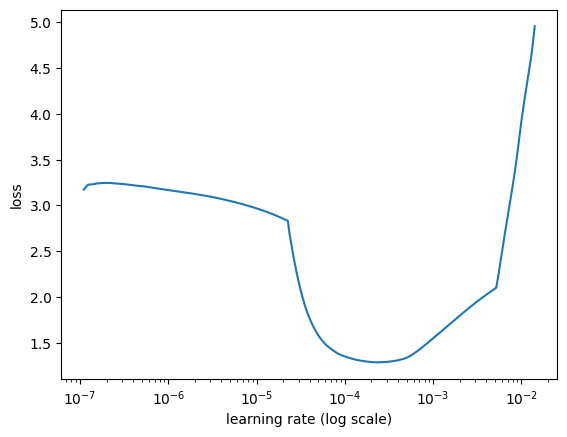

In [13]:
learner.lr_plot()

In [14]:
learner.autofit(1e-4)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/1024
546/546 [==============================] - 184s 293ms/step - loss: 1.3800 - accuracy: 0.5934 - val_loss: 0.9618 - val_accuracy: 0.7270
Epoch 2/1024
546/546 [==============================] - 151s 277ms/step - loss: 0.7349 - accuracy: 0.7827 - val_loss: 0.9209 - val_accuracy: 0.7310
Epoch 3/1024
546/546 [==============================] - 152s 279ms/step - loss: 0.4952 - accuracy: 0.8603 - val_loss: 0.9688 - val_accuracy: 0.7453
Epoch 4/1024
546/546 [==============================] - ETA: 0s - loss: 0.3503 - accuracy: 0.8999
Epoch 00004: Reducing Max LR on Plateau: new max lr will be 5e-05 (if not early_stopping).
546/546 [==============================] - 152s 279ms/step - loss: 0.3503 - accuracy: 0.8999 - val_loss: 1.0960 - val_accuracy: 0.7218
Epoch 5/1024
546/546 [=========================

In [15]:
learner.validate(val_data=(x_val_bert, y_val_bert), class_names=["society", "sport", "politics" , "conflict, war and peace" , "religion and belief" , "science and technology" , "labour" ,
                                                                                                        "health", "education", "environment", "human interest" , "crime, law and justice" , "disaster, accident and emergency incident" ,
                                                                                                        "weather" , "economy, business and finance" , "arts, culture, entertainment and media" , "lifestyle and leisure"])

55/55 [==============================] - 13s 146ms/step
                                           precision    recall  f1-score   support

                                  society       0.58      0.54      0.56        48
                                    sport       0.81      0.81      0.81       128
                                 politics       0.76      0.71      0.74        80
                  conflict, war and peace       0.63      0.66      0.65        80
                      religion and belief       0.68      0.69      0.68        64
                   science and technology       0.74      0.67      0.70        97
                                   labour       0.86      0.82      0.84        96
                                   health       0.78      0.88      0.83       112
                                education       0.72      0.71      0.72        96
                              environment       0.80      0.84      0.82       113
                           hum

array([[ 26,   0,   2,   0,   0,   1,   1,   0,   3,   1,   0,   4,   1,
          2,   6,   1,   0],
       [  0, 104,   0,   0,   1,   0,   2,   2,   0,   1,   0,  12,   5,
          0,   1,   0,   0],
       [  0,   1,  57,   1,   1,   0,   0,   1,   0,   0,   0,   9,   2,
          5,   3,   0,   0],
       [  0,   1,   3,  53,   1,   0,   4,   1,   1,   0,   0,   4,   2,
          0,   3,   0,   7],
       [  0,   2,   1,   2,  44,   0,   1,   0,   0,   5,   0,   8,   0,
          1,   0,   0,   0],
       [  1,   1,   2,   1,   0,  65,   0,   0,   1,   3,   0,   1,   9,
          2,   9,   2,   0],
       [  0,   1,   0,   2,   2,   0,  79,   0,   5,   0,   0,   0,   1,
          4,   2,   0,   0],
       [  1,   0,   1,   1,   0,   1,   0,  99,   1,   2,   0,   3,   1,
          1,   1,   0,   0],
       [  0,   1,   0,   0,   3,   1,   2,   2,  68,   0,   1,   0,   2,
          6,   5,   5,   0],
       [  1,   0,   0,   0,   3,   3,   0,   1,   0,  95,   1,   3,   0,
         

In [16]:
# getting predictor variable
predictor = ktrain.get_predictor(learner.model, preproc)

In [17]:
learner.print_layers()

0 (trainable=True) : <keras.src.engine.input_layer.InputLayer object at 0x78aec1944190>
1 (trainable=True) : <keras.src.engine.input_layer.InputLayer object at 0x78aec1945300>
2 (trainable=True) : <keras_bert.layers.embedding.TokenEmbedding object at 0x78aec1945780>
3 (trainable=True) : <keras.src.layers.core.embedding.Embedding object at 0x78aec19444f0>
4 (trainable=True) : <keras.src.layers.merging.add.Add object at 0x78aec1945b40>
5 (trainable=True) : <keras_pos_embd.pos_embd.PositionEmbedding object at 0x78aec19443a0>
6 (trainable=True) : <keras.src.layers.regularization.dropout.Dropout object at 0x78aec1944d00>
7 (trainable=True) : <keras_layer_normalization.layer_normalization.LayerNormalization object at 0x78aec1946b30>
8 (trainable=True) : <keras_multi_head.multi_head_attention.MultiHeadAttention object at 0x78aec1944490>
9 (trainable=True) : <keras.src.layers.regularization.dropout.Dropout object at 0x78aec1945630>
10 (trainable=True) : <keras.src.layers.merging.add.Add object

In [18]:
y_pred = predictor.predict(x_test.tolist())


In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def compute_classification_report(true_labels_column, predicted_labels_column):
    # y_true = sampled_df[true_labels_column]
    # y_pred = sampled_df[predicted_labels_column]
    report = classification_report(true_labels_column, predicted_labels_column)
    # print(predicted_labels_column)
    print(report)
    accuracy = accuracy_score(true_labels_column, predicted_labels_column)
    return accuracy

In [23]:
compute_classification_report(y_test , y_pred)

['health', 'human interest', 'economy, business and finance', 'crime, law and justice', 'education', 'labour', 'education', 'education', 'economy, business and finance', 'human interest', 'arts, culture, entertainment and media', 'sport', 'education', 'science and technology', 'conflict, war and peace', 'sport', 'labour', 'science and technology', 'economy, business and finance', 'environment', 'crime, law and justice', 'crime, law and justice', 'politics', 'religion and belief', 'religion and belief', 'society', 'labour', 'politics', 'society', 'education', 'environment', 'health', 'society', 'religion and belief', 'arts, culture, entertainment and media', 'health', 'religion and belief', 'sport', 'crime, law and justice', 'sport', 'health', 'crime, law and justice', 'health', 'society', 'society', 'politics', 'politics', 'conflict, war and peace', 'society', 'politics', 'labour', 'health', 'disaster, accident and emergency incident', 'religion and belief', 'labour', 'lifestyle and le

0.7414187643020596

**-----------------------------------------------**

In [2]:
df2 = pd.read_csv("https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv")
df2.columns = ["label" , "title" , "content"]
df2['label'] = df2['label'].map({1: "world", 2: "sports", 3: "business", 4: "sci/tech"})


In [3]:
df2

,label,title,content
0,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
1,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
2,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
3,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
4,business,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...
...,...,...,...
119994,world,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119995,sports,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119996,sports,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119997,sports,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [4]:
df2.label.value_counts()

sci/tech    30000
sports      30000
world       30000
business    29999
Name: label, dtype: int64

In [5]:
X = df2.content
Y = df2.label

In [6]:
# x_train, x_val, y_train, y_val = train_test_split(df['content'], df['category_1'], shuffle=True, test_size = 0.2, random_state = 12342 , stratify=df['category_1'])
# x_train, x_val, y_train, y_val = train_test_split(df['content'], df['category_1'], shuffle=True, test_size = 0.2, random_state = 12342 , stratify=df['category_1'])
X_train, X_temp, y_train, y_temp = train_test_split(X,Y , shuffle=True, test_size = 0.9, random_state = 12342 , stratify=Y)

# Then, split the temporary set into a validation set and a test set (50% for each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, shuffle=True, test_size = 0.9, random_state = 12342 , stratify=y_temp)


In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(11999,)
(11999,)
(10800,)
(10800,)
(97200,)
(97200,)


In [8]:
x_train = X_train.values
x_val = X_val.values
y_train = y_train.values
y_val = y_val.values
x_test = X_test.values
y_test = y_test.values

In [9]:
(x_train_bert,  y_train_bert), (x_val_bert, y_val_bert), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                                         x_test = x_val, y_test=y_val,
                                                                                          class_names= ["0", "1" ,"2" , "3"],
                                                                                          preprocess_mode='bert',
                                                                                          lang = 'en',
                                                                                          maxlen=65,
                                                                                          max_features=36000)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


task: text classification


In [10]:
model = text.text_classifier('bert', train_data=(x_train_bert, y_train_bert), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train_bert, y_train_bert), val_data=(x_val_bert, y_val_bert), batch_size=16)

Is Multi-Label? False
maxlen is 65


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [11]:
learner.lr_find()             # briefly simulate training to find good learning rate


simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/1024
750/750 [==============================] - 205s 242ms/step - loss: 0.8025 - accuracy: 0.6763
Epoch 2/1024
750/750 [==============================] - 144s 192ms/step - loss: 3.1593 - accuracy: 0.3345


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


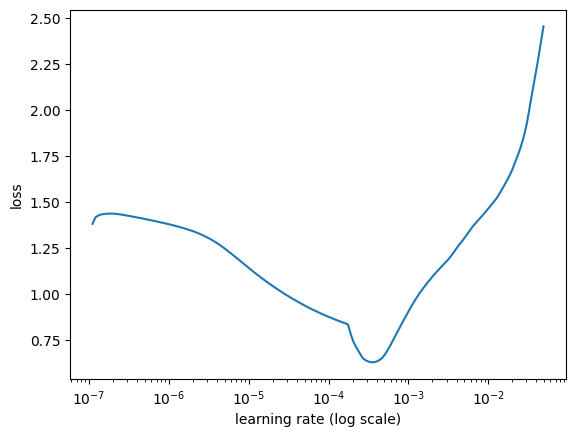

In [12]:
learner.lr_plot()

In [13]:
learner.autofit(1e-5)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/1024
750/750 [==============================] - 298s 371ms/step - loss: 0.4855 - accuracy: 0.8289 - val_loss: 0.2576 - val_accuracy: 0.9117
Epoch 2/1024
750/750 [==============================] - 244s 325ms/step - loss: 0.2300 - accuracy: 0.9220 - val_loss: 0.2419 - val_accuracy: 0.9183
Epoch 3/1024
750/750 [==============================] - 272s 363ms/step - loss: 0.1704 - accuracy: 0.9424 - val_loss: 0.2401 - val_accuracy: 0.9195
Epoch 4/1024
750/750 [==============================] - 244s 325ms/step - loss: 0.1253 - accuracy: 0.9592 - val_loss: 0.2543 - val_accuracy: 0.9204
Epoch 5/1024
750/750 [==============================] - ETA: 0s - loss: 0.0875 - accuracy: 0.9717
Epoch 00005: Reducing Max LR on Plateau: new max lr will be 5e-06 (if not early_stopping).
750/750 [==========================

In [14]:
learner.validate(val_data=(x_val_bert, y_val_bert), class_names=["world", "sport", "business" , "sci/tech"])

338/338 [==============================] - 57s 155ms/step
              precision    recall  f1-score   support

       world       0.91      0.86      0.89      2700
       sport       0.87      0.92      0.89      2700
    business       0.97      0.98      0.98      2700
    sci/tech       0.93      0.92      0.92      2700

    accuracy                           0.92     10800
   macro avg       0.92      0.92      0.92     10800
weighted avg       0.92      0.92      0.92     10800



array([[2327,  273,   16,   84],
       [ 128, 2476,    9,   87],
       [  14,   16, 2645,   25],
       [  87,   82,   48, 2483]])

In [16]:
# getting predictor variable
predictor = ktrain.get_predictor(learner.model, preproc)

In [17]:
learner.print_layers()

0 (trainable=True) : <keras.src.engine.input_layer.InputLayer object at 0x7c68b57a94b0>
1 (trainable=True) : <keras.src.engine.input_layer.InputLayer object at 0x7c68b57aac80>
2 (trainable=True) : <keras_bert.layers.embedding.TokenEmbedding object at 0x7c68b57abc70>
3 (trainable=True) : <keras.src.layers.core.embedding.Embedding object at 0x7c68b57abd30>
4 (trainable=True) : <keras.src.layers.merging.add.Add object at 0x7c68b57ab2e0>
5 (trainable=True) : <keras_pos_embd.pos_embd.PositionEmbedding object at 0x7c68b57aa620>
6 (trainable=True) : <keras.src.layers.regularization.dropout.Dropout object at 0x7c68b57ab220>
7 (trainable=True) : <keras_layer_normalization.layer_normalization.LayerNormalization object at 0x7c68b57a9330>
8 (trainable=True) : <keras_multi_head.multi_head_attention.MultiHeadAttention object at 0x7c68b57a8e50>
9 (trainable=True) : <keras.src.layers.regularization.dropout.Dropout object at 0x7c68b57abc10>
10 (trainable=True) : <keras.src.layers.merging.add.Add object

In [18]:
y_pred = predictor.predict(x_test.tolist())


In [20]:
compute_classification_report(y_test , y_pred)

              precision    recall  f1-score   support

    business       0.91      0.86      0.88     24300
    sci/tech       0.87      0.92      0.89     24300
      sports       0.97      0.98      0.97     24300
       world       0.93      0.92      0.92     24300

    accuracy                           0.92     97200
   macro avg       0.92      0.92      0.92     97200
weighted avg       0.92      0.92      0.92     97200



0.9183333333333333